In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = '/content/gdrive/My Drive/'
import os
os.chdir(root_path)

In [78]:
#importing required libraries

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
import csv 
import pandas as pd
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# reading the dataset
df = pd.read_csv('tweets-dataset.csv')

# Storing the data in a string
string = ""
for ind in df.index:
    string = string + " " + df['Sentence'][ind]

In [0]:
#cleaning the data
#removing urls, usernames, hashtags, unwanted symbols and emojis

string = re.sub(r"(http)[^\s]*", "",string )
string = re.sub(r"@[^\s]*", "" , string)
string = re.sub(r"#[^\s]*", "", string)
string = re.sub(r"(pic.twitter)[^\s]*", "", string)
string = re.sub(r":[a-zA-Z0-9\s]", "", string)
string = re.sub(r'[^a-zA-Z0-9\s]', "", string)
string = string.lower()


In [61]:
#counting number of tokens

tokens = word_tokenize(string)
print("The total number of tokens are {}".format(len(tokens)))

The total number of tokens are 287012


In [80]:
# frequency distribution of tokens
#counting total types

types = sorted(FreqDist(tokens).items(),key=lambda k:k[1], reverse=True)
print("The total number of types are {}".format(len(types)))

The total number of types are 32781


In [81]:
#calculating type token ratio 

TTR = len(types)/len(tokens)
print(" The TTR is {}".format(TTR))


 The TTR is 0.11421473666606274


Text(0.5, 1.0, "Zipf's law for Length")

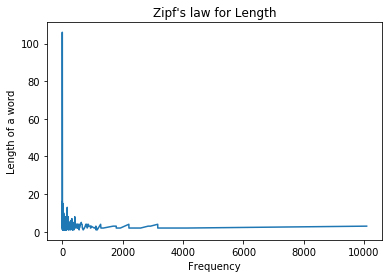

In [82]:
#Zipf's Law (relation between frequency of words and length of word)

freq = []
length = []

for i in range(len(types)):
  freq.append(types[i][1])
  length.append(len(types[i][0]))
    
plt.plot(freq, length)
plt.xlabel("Frequency")
plt.ylabel("Length of a word")
plt.title("Zipf's law for Length")

Text(0.5, 1.0, "Zipf's Law for meanings")

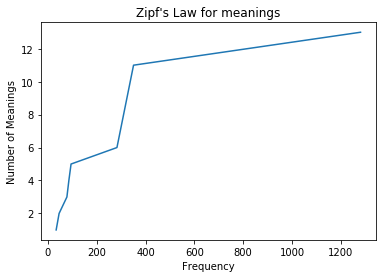

In [83]:
#Plotting Zipf's law for meanings

m = []
f = []
#These indices are randomly selected in order to plot the Zipf's Law
index= [19,95,131,404,444,496,826,1049]
index.sort()

for i in range(len(index)):
  m.append(len(wordnet.synsets(types[index[i]][0])))
  f.append(types[index[i]][1])
    
plt.plot(f,m)
plt.xlabel("Frequency")
plt.ylabel("Number of Meanings")
plt.title("Zipf's Law for meanings")


Text(0.5, 1.0, "Heap's Law")

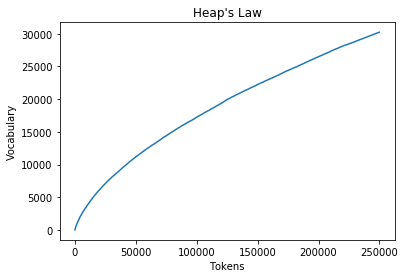

In [84]:
#Heaps Law
N = [] 
for i in range(2500):
  j = 100*i
  lst = tokens[0: j] 
  V = j
  types1 = FreqDist(lst)
  N.append(len(types1))
  
#Plotting Heap's Law
V = []
for i in range(2500):
  j= i*100
  V.append(j)
    
plt.plot(V, N)
plt.xlabel("Tokens")
plt.ylabel("Vocabulary")
plt.title("Heap's Law")
  
  
